In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from os import chdir 
%matplotlib inline

In [2]:
chdir("C:\\Users\\afeki\\OneDrive\\Desktop\\code\\BootStrapDesicionTree\\experiments\\detect_uninformative_feature_simulated_data\\")
with open('results/experiments_results/detect_uninformative_feature_results.pkl', 'rb') as output:
    results = pickle.load(output)

In [3]:
experiments = list(set(exp[0] for exp in results.keys()))
categories = sorted(list(set(exp[1] for exp in results.keys())))
fi_dict = {'gain': 0, 'permutation_train':1,'permutation_test':2, 'shap_train':3, 'shap_test':4}

In [4]:
def create_fi_df(fi):
    df = pd.DataFrame()
    for exp in experiments:
        for cat in categories:
            try:
                df.loc[exp, cat] = results[(exp,cat)][fi_dict[fi]]
            except:
                continue
    return 1 - df

def plot_fi(df, method):
    plt.rcParams['figure.figsize'] = [20, 10]
    ax = df.T.plot()
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{method} Feature importance  of the category vaector with K categories as a function of K")
    plt.legend(loc='upper right')
    plt.show()
    

# Create simulated data
$$ y = a_1 \cdot x_1 + a_2 \cdot I(x_2 \in LEFT\_GROUP) + \sigma $$

$$ x1 - N(0,1) $$

$$a_1 = 3 , a_2 = 2, \sigma = 10$$

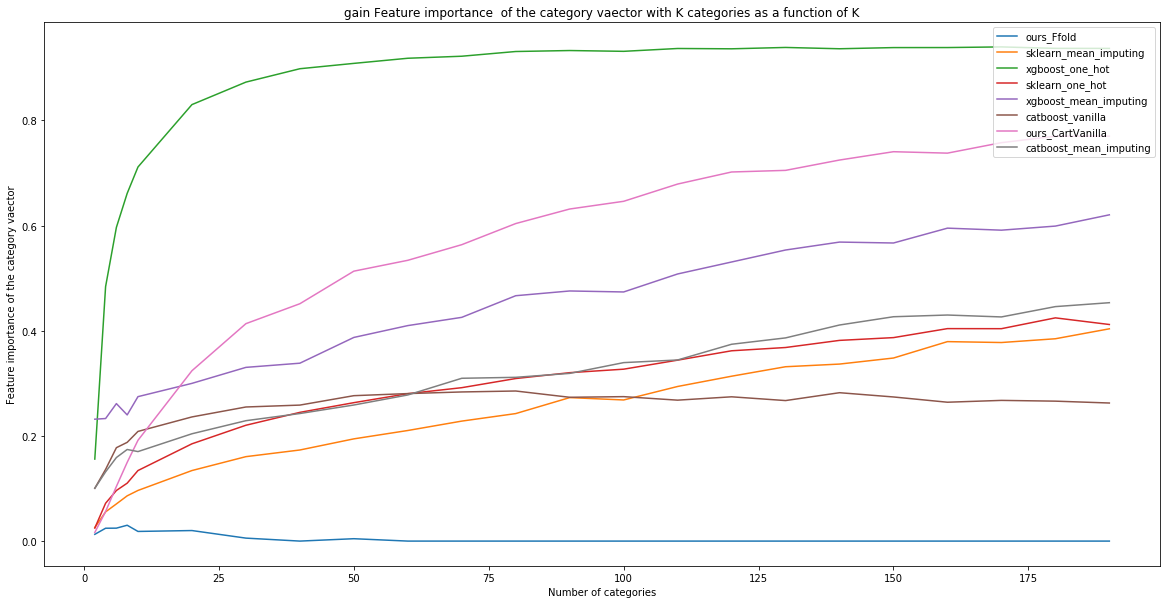

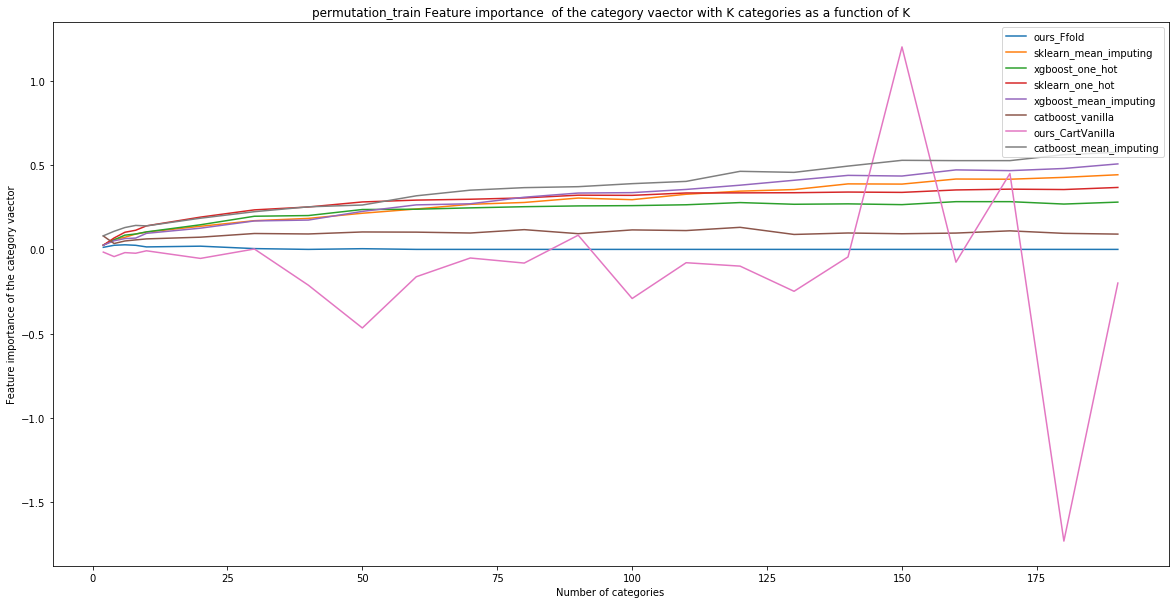

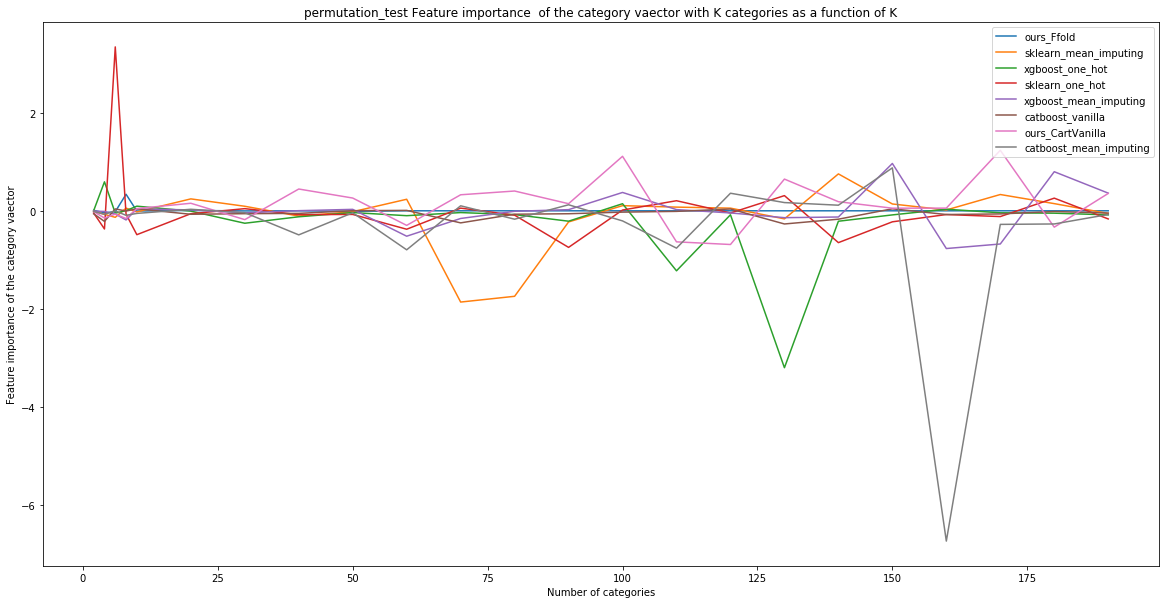

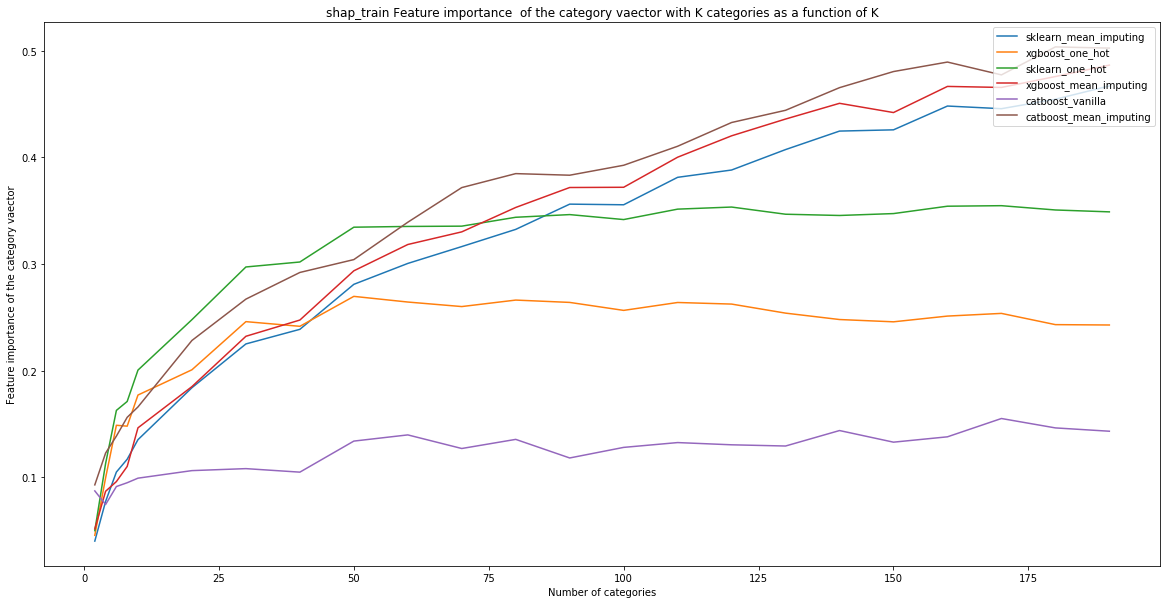

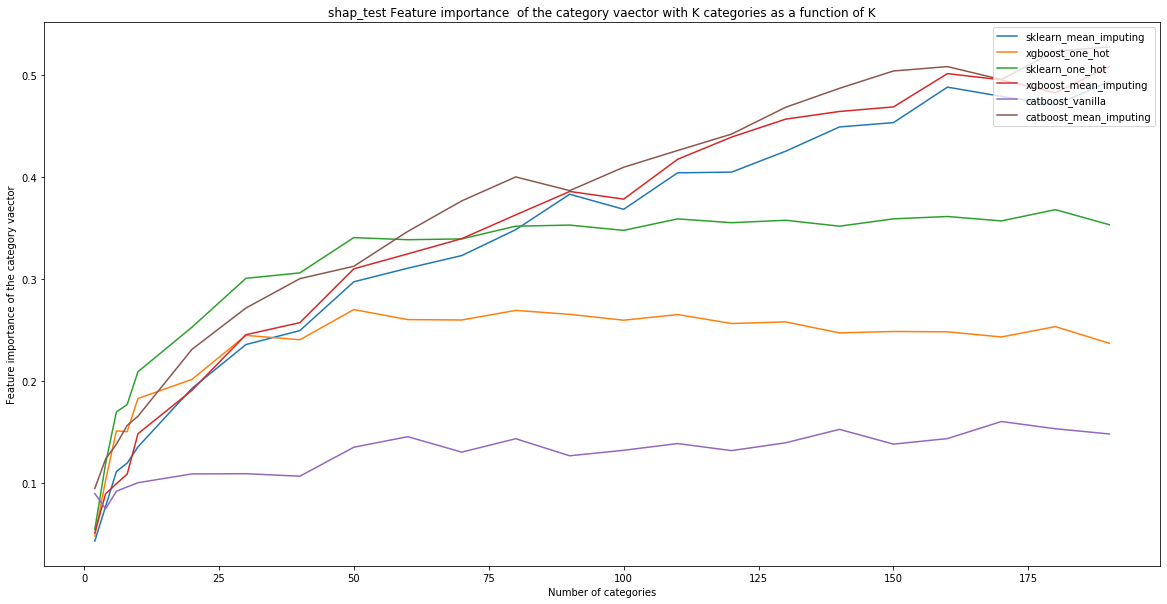

In [5]:
for fi in fi_dict.keys():
    plot_fi(create_fi_df(fi), fi)
